In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

Exercise 1 : Understanding the problem and Data Collection

We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
positive_cases = df[df['diabetes'] == 1]
negative_cases = df[df['diabetes'] == 0]
print(f"Number of positive cases: {len(positive_cases)}")
print(f"Number of negative cases: {len(negative_cases)}")

Number of positive cases: 8500
Number of negative cases: 91500


# Answer to how many positive and negative cases is there: As can be seen from above: there are 8500 positive cases where in the column of diabetes is marked as 1, while there are 91500 cases of negative cases.

Split the data into training and testing sets

 Exercise 2 : Model Picking and Standardization


**Which classification model can we use in this problem and why?**

We can use models such as Logistic Regression, Random Forest, or SVM. Logistic Regression is a good starting point because it is simple, interpretable, and effective for binary classification problems.


**Do we need to standardize the data ? If yes, use .StandardScaler()**

Yes, standardization is necessary because models like Logistic Regression and SVM are sensitive to the scale of the features. We can use StandardScaler() to standardize the features.



In [6]:
## # Step 1: Drop the target column
# X = df.drop('diabetes', axis=1)

# # Step 2: One-hot encode categorical columns (你需要进行One-Hot Encoding 或 Label Encoding：because LogisticRegression does require numeric input)
# X = pd.get_dummies(X, drop_first=True)  # this encodes 'gender' and 'smoking_history'

# # Step 3: Target
# y = df['diabetes']

# # Step 4: Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#------------------------------------------------------------------#including standardization:You should use StandardScaler() after encoding categorical variables and before train-test splitting or immediately after splitting, depending on your goal

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize (scale) the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit only on training data
X_test_scaled = scaler.transform(X_test)        # use the same scaler for test data

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9595454545454546
Confusion Matrix:
 [[29952   264]
 [ 1071  1713]]


🌟 Exercise 4 : Evaluation Metrics


Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.
Answer: Accuracy: 0.9595454545454546.


In [7]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     30216
           1       0.87      0.62      0.72      2784

    accuracy                           0.96     33000
   macro avg       0.92      0.80      0.85     33000
weighted avg       0.96      0.96      0.96     33000



✅ answer to question 4: reading the results:
Interpretation of each metrics:
1. Precision: Of all the samples the model predicted as positive (has diabetes), how many were actually positive. High precision = few false positives.
2. Recall: Of all the actual positive samples, how many were correctly identified. High recall = few false negatives.
3. F1-Score: Harmonic mean of precision and recall. Useful when you need a balance between the two.
4. Support: The number of true instances for each class in the test dataset.


📊 Class-wise Results

Class 0 (No diabetes):
	•	Precision: 0.97 – very few people wrongly classified as not having diabetes.
	•	Recall: 0.99 – almost all non-diabetic individuals were correctly identified.
	•	F1-score: 0.98 – excellent overall performance.
	•	Support: 30,216 samples – a large majority of the dataset.

Class 1 (Has diabetes):
	•	Precision: 0.87 – relatively few false positives.
	•	Recall: 0.62 – only 62% of diabetic individuals were detected (many false negatives).
	•	F1-score: 0.72 – decent, but could be better.
	•	Support: 2,784 samples – much fewer samples than class 0, indicating imbalance.

⸻

📈 Overall Performance
	•	Accuracy: 0.96 – 96% of all predictions are correct.
	•	Macro Avg: (unweighted average) shows that class 1 performance drags down the average recall (0.80).
	•	Weighted Avg: (adjusted by class size) shows strong overall performance (all ~0.96), driven mainly by class 0.

Summary:
	•	The model performs very well overall, especially for the majority class (no diabetes). For Class 0(No diabetes), precision is 0.97 meaning that very few people wrongly classified as not having diabetes, while recall is 0.99 meaning that all non-diabetic individuales were correctly identified, and support  is 30,216 samples which is a large majoritiy of the dataset.

	•	However, the recall for diabetic cases is low (62%), which is a concern in medical settings where missing a positive case is risky.

	•	There is class imbalance, which may contribute to the lower recall for class 1.

🌟 Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.


🌟 Exercise 6 : ROC Curve
Plot the ROC Curve using this code template available on this link

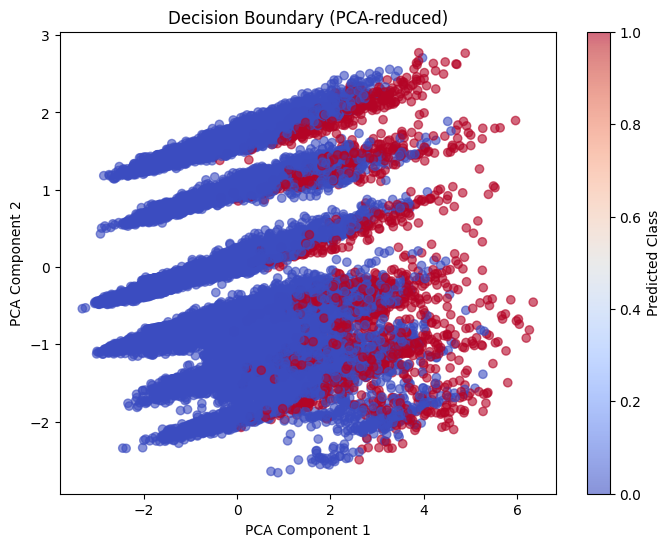

In [8]:
from sklearn.decomposition import PCA

# 将特征降维到2维 由于你的数据是高维的（有多个特征），我们无法直接画出决策边界。但可以使用 PCA 降维到 2D 来近似可视化：
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_scaled)

# 再次预测（相同模型）
y_pred = model.predict(X_test_scaled)

# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, label='Predicted Class')
plt.title('Decision Boundary (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Predicted Class')
plt.show()

📌 How to Interpret This
	1.	Each dot = one person in your dataset (after PCA transformation).
	2.	Clustering:
	•	Blue clusters are people predicted not diabetic.
	•	Red clusters are predicted diabetic.
	3.	Model Confidence:
	•	Dark red or dark blue = high confidence.
	•	Lighter/mixed areas = model is less confident, predictions are near 0.5.

⸻

🧠 Insight About Model Performance
	•	There’s a reasonable separation between red and blue regions, meaning the model can distinguish the classes fairly well.
	•	However, there is overlap in some areas—especially in the center—suggesting:
	•	Some data points are ambiguous.
	•	Your model is not 100% confident for every case.

This matches your earlier results where:
	•	Accuracy is high (around 96%)
	•	But recall for diabetic cases is lower (~62%) → some diabetics are missed.


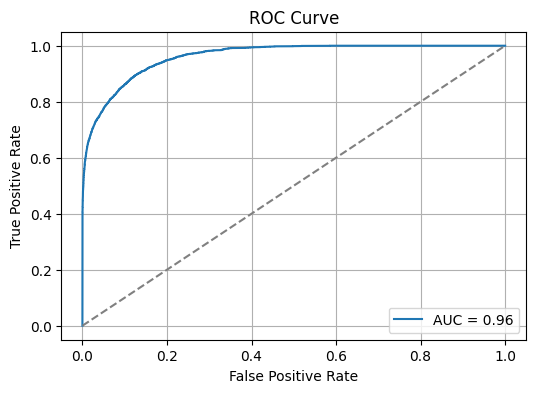

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# 获取预测概率
y_probs = model.predict_proba(X_test_scaled)[:, 1]  #predict_proba gives probabilities for both class 0 and class 1.
	                                                  #[:, 1] selects the probability of class 1 (diabetes) — needed to plot the ROC.

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#Calculates:
	# •	fpr: false positive rate
	# •	tpr: true positive rate
	# •	thresholds: thresholds at which FPR/TPR are calculated
auc = roc_auc_score(y_test, y_probs)
# 	•	Computes the AUC (Area Under the Curve) value — summarizes model performance.
#   •	Range: 0.5 (random guessing) to 1.0 (perfect classifier)

# 绘图
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

The ROC Curve shows that the result from the logistic regression model is very good.


✅ How to Interpret This ROC Curve

1. Axes Meaning:
	•	X-axis: False Positive Rate (FPR)
	•	Proportion of negative cases (no diabetes) incorrectly predicted as positive.
	•	Y-axis: True Positive Rate (TPR) — also called Recall
	•	Proportion of positive cases (diabetes) correctly predicted.

⸻

2. Diagonal Dashed Line:
	•	This represents a random classifier (AUC = 0.5).
	•	Any model above this line is better than random.

⸻

3. Your Curve:
	•	Your ROC curve hugs the top-left corner, which is excellent.
	•	It shows that your model:
	•	Identifies a high proportion of actual positives (high TPR),
	•	While maintaining a low number of false positives (low FPR).

⸻

4. AUC = 0.96:
	•	AUC (Area Under the Curve) summarizes the model’s ability to distinguish between the classes.
	•	Range:
	•	0.5 = random guessing
	•	1.0 = perfect classifier
	•	Your model’s AUC of 0.96 means:
There’s a 96% chance that the model ranks a randomly chosen positive case (diabetes) higher than a randomly chosen negative one.

⸻
